# Project #3 - Predictive Analytics on Tapsell's Advertisement Dataset

#### This data is mainly provided for the task of click prediction in Mediaad digital advertising platform. Mediaad shows native ads on website pages. Each webpage has some places that serve the advertisements which is called widgets. Each widget can show single or multiple ads. The goal of this task is to predict whether a user will click on a specific ad or not.

#### In this notebook, you will be instructed to perform several steps of analysis in order to predict whether a user will click on an advertisement or not.

#### Click on <a href="https://drive.google.com/file/d/1tVYbSaG0JdxTLLPSAESnBNvj_RIxKg5B/view?usp=sharing">this link</a> to download the dataset and <a href="https://github.com/tapsellbrain/mediaad-dataset/wiki/Dataset-Description">this link</a> to get more information about the dataset. 

## ➡️&nbsp; Loading The Dataset

**Load `event.csv`, `user_page_view.csv`, `creative.csv`, `click_train.csv`, and `creative_image.csv`. Check for any missing, duplicated, or unrelated values and handle them properly.**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
event = pd.read_csv('event.csv')
user_page_view = pd.read_csv('user_page_view.csv')
creative = pd.read_csv('creative.csv')
click_train = pd.read_csv('click_train.csv')
creative_image = pd.read_csv('creative_image.csv')

In [57]:
click_test = pd.read_csv('click_test.csv')
creative_title = pd.read_csv('creative_title.csv')
document = pd.read_csv('document.csv')
document_topic = pd.read_csv('document_topic.csv')

In [3]:
event.head()

,displayId,timestamp,docId,widgetId,userId,device,OS,browser
0,4706262,1578429005696,3543873,6262,2688642,0,0,0
1,4706267,1578429007726,6245475,607,2688641,1,3,0
2,4706260,1578429012060,4416499,11458,2688638,0,0,1
3,4706255,1578429017218,6246028,9358,1962852,0,0,0
4,4706256,1578429021388,5327047,9358,2687719,0,0,0


In [4]:
event.info(), event.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083071 entries, 0 to 1083070
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   displayId  1083071 non-null  int64
 1   timestamp  1083071 non-null  int64
 2   docId      1083071 non-null  int64
 3   widgetId   1083071 non-null  int64
 4   userId     1083071 non-null  int64
 5   device     1083071 non-null  int64
 6   OS         1083071 non-null  int64
 7   browser    1083071 non-null  int64
dtypes: int64(8)
memory usage: 66.1 MB


(None,
           displayId     timestamp         docId      widgetId        userId  \
 count  1.083071e+06  1.083071e+06  1.083071e+06  1.083071e+06  1.083071e+06   
 mean   2.517466e+06  1.579188e+12  5.311521e+06  7.464358e+03  1.239831e+06   
 std    1.313295e+06  4.583947e+08  3.725029e+06  4.394785e+03  7.914076e+05   
 min    1.516500e+05  1.578429e+12  4.000000e+00  9.000000e+00  8.000000e+00   
 25%    1.328586e+06  1.578799e+12  4.120830e+05  3.582000e+03  5.335820e+05   
 50%    2.579519e+06  1.579161e+12  6.627877e+06  7.711000e+03  1.172044e+06   
 75%    3.661700e+06  1.579599e+12  8.463374e+06  1.157100e+04  1.938347e+06   
 max    4.706267e+06  1.579984e+12  1.056114e+07  1.436600e+04  2.688642e+06   
 
              device            OS       browser  
 count  1.083071e+06  1.083071e+06  1.083071e+06  
 mean   2.737623e-01  3.605101e-01  1.117450e+00  
 std    4.541610e-01  6.267258e-01  2.539904e+00  
 min    0.000000e+00  0.000000e+00  0.000000e+00  
 25%    0.000000

In [5]:
creative.head()

,creativeId,campaignId,advertiserId
0,7867,5918,8414
1,7866,5918,8414
2,7865,5918,8414
3,7863,8343,8414
4,7862,8343,8414


In [6]:
creative.info(), creative.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3256 entries, 0 to 3255
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   creativeId    3256 non-null   int64
 1   campaignId    3256 non-null   int64
 2   advertiserId  3256 non-null   int64
dtypes: int64(3)
memory usage: 76.4 KB


(None,
         creativeId   campaignId  advertiserId
 count  3256.000000  3256.000000   3256.000000
 mean   5624.645577  4958.381757   5638.853194
 std    1957.739025  2678.464798   2722.979337
 min       6.000000    30.000000      1.000000
 25%    5220.750000  2664.750000   3137.000000
 50%    6150.500000  5095.000000   6572.000000
 75%    6994.250000  7270.000000   8078.000000
 max    7867.000000  9523.000000  10749.000000)

In [7]:
user_page_view.head()

,userId,docId,timestamp
0,821961,8116,1579599211445
1,15321,9533442,1579599211443
2,1125090,9410379,1579599211440
3,407101,8616213,1579599211429
4,781615,9543366,1579599211429


In [8]:
user_page_view.info(), user_page_view.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67229821 entries, 0 to 67229820
Data columns (total 3 columns):
 #   Column     Dtype
---  ------     -----
 0   userId     int64
 1   docId      int64
 2   timestamp  int64
dtypes: int64(3)
memory usage: 1.5 GB


(None,
              userId         docId     timestamp
 count  6.722982e+07  6.722982e+07  6.722982e+07
 mean   1.082700e+06  5.381278e+06  1.579000e+12
 std    7.593801e+05  3.353457e+06  3.399870e+08
 min    8.000000e+00  3.000000e+00  1.578429e+12
 25%    4.222600e+05  2.285483e+06  1.578721e+12
 50%    9.607940e+05  6.775661e+06  1.578984e+12
 75%    1.700401e+06  7.989253e+06  1.579313e+12
 max    2.688642e+06  9.571037e+06  1.579599e+12)

In [9]:
creative_image.head()

,creativeId,imageFeatures
0,7867,"[0.0524589940905571, 0.0, 0.04262353479862213,..."
1,7866,"[0.0032160670962184668, 0.1444239318370819, 0...."
2,7865,"[0.027210379019379616, 0.0, 0.5133526921272278..."
3,7863,"[0.0013980235671624541, 0.0, 0.0, 0.0455568209..."
4,7862,"[0.02426762878894806, 0.026081759482622147, 0...."


In [10]:
creative_image.info(), creative_image.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3256 entries, 0 to 3255
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   creativeId     3256 non-null   int64 
 1   imageFeatures  3256 non-null   object
dtypes: int64(1), object(1)
memory usage: 51.0+ KB


(None,
         creativeId
 count  3256.000000
 mean   5624.645577
 std    1957.739025
 min       6.000000
 25%    5220.750000
 50%    6150.500000
 75%    6994.250000
 max    7867.000000)

In [11]:
click_train.head()

,displayId,creativeId,clicked
0,1210227,7182,0
1,1210227,7125,0
2,1210227,7181,0
3,1210227,535,0
4,1210227,7174,1


In [12]:
click_train.info(), click_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642244 entries, 0 to 3642243
Data columns (total 3 columns):
 #   Column      Dtype
---  ------      -----
 0   displayId   int64
 1   creativeId  int64
 2   clicked     int64
dtypes: int64(3)
memory usage: 83.4 MB


(None,
           displayId    creativeId       clicked
 count  3.642244e+06  3.642244e+06  3.642244e+06
 mean   3.105835e+06  3.853480e+03  2.230227e-01
 std    9.807950e+05  2.465609e+03  4.162735e-01
 min    1.210227e+06  6.000000e+00  0.000000e+00
 25%    2.246184e+06  6.810000e+02  0.000000e+00
 50%    3.162424e+06  5.049000e+03  0.000000e+00
 75%    3.913442e+06  5.890000e+03  0.000000e+00
 max    4.706267e+06  7.182000e+03  1.000000e+00)

## ➡️&nbsp; EDA

**Find the top five advertisers with the most number of ads. How many advertisement campaigns does each one have?**

In [50]:
top5 = creative.groupby('advertiserId')['campaignId'].count().sort_values(ascending=False)[:5].index.to_numpy()
top5

array([8414, 6578, 2167, 7903, 6973])

In [56]:
creative[creative['advertiserId'].isin(top5)].groupby(['advertiserId','campaignId']).count()

creativeId
advertiserId campaignId            
2167         316                 11
             2031                13
             2664                11
             4355                 8
             5043                12
             6280                 5
             6380                 5
             7861                12
             8078                13
             8398                 8
             8804                 8
             8824                12
             8885                11
             9029                 8
6578         693                 37
             1474                10
             2552                18
             4227                22
             6344                18
             6850                48
             7270                18
             7426                10
6973         784                  9
             2837                12
             3674                10
             3771                14
             3930                 9
             4416                 8
             4566                 5
             4956                 9
             4981                 6
             6070                 9
             7143                 8
             8449                 7
7903         1001                 9
             3997                10
             4042                 4
             4044                17
             4155                 9
             4611                 5
             5564                 5
             6775                 5
             6782                11
             7691                12
             8265                 5
             8964                17
8414         2055                 9
             5606                 5
             5918               160
             6155                32
             7285                 7
             8343               211

**Which webpage (`docID`) received the biggest number of clicks? Which ads were displayed on that page?**

In [77]:
clk1 = click_train[click_train['clicked']>0]['displayId'].to_numpy()
event[event['displayId'].isin(clk1)].groupby('docId')['displayId'].count().sort_values(ascending=False)

docId
8116       15322
2285483    12532
205         6973
555         4057
163         2877
           ...  
2123841        1
2123684        1
2123617        1
2123100        1
9570822        1
Name: displayId, Length: 151723, dtype: int64

In [81]:
left = click_train[click_train['clicked']>0]
left

,displayId,creativeId,clicked
4,1210227,7174,1
6,1214987,7092,1
9,1248098,17,1
15,1271266,7182,1
17,1272722,7092,1
...,...,...,...
3642225,4706255,3614,1
3642231,4706256,25,1
3642234,4706260,49,1
3642236,4706262,6,1


In [82]:
right = event[event['docId']==8116] # page with docId 8116 is the answer
right

,displayId,timestamp,docId,widgetId,userId,device,OS,browser
25,4706108,1578429104888,8116,8142,2688584,0,0,4
97,4705832,1578429401422,8116,8142,2688393,0,0,0
218,4705315,1578429846335,8116,5366,2688112,1,1,0
236,4705226,1578429928565,8116,10521,2688057,1,1,4
257,4705146,1578429990851,8116,8142,2688008,0,0,0
...,...,...,...,...,...,...,...,...
1082699,245808,1579982131502,8116,8142,1521,0,2,2
1082713,245754,1579982209156,8116,8142,1459,0,0,0
1082741,245584,1579982338574,8116,8142,1337,0,0,0
1082781,245288,1579982514662,8116,8142,1088,0,0,0


In [90]:
result = pd.merge(left, right, how="inner", on='displayId')
result
# creativeId is the answer

,displayId,creativeId,clicked,timestamp,docId,widgetId,userId,device,OS,browser
0,1329157,7179,1,1579599163338,8116,5366,781923,1,1,0
1,1329168,6958,1,1579599161648,8116,5366,607607,1,1,4
2,1329366,7173,1,1579599122892,8116,8142,277647,0,0,0
3,1329447,6515,1,1579599101471,8116,8142,782097,0,0,0
4,1329449,6703,1,1579599109518,8116,8142,610103,0,0,0
...,...,...,...,...,...,...,...,...,...,...
15317,4705146,2610,1,1578429990851,8116,8142,2688008,0,0,0
15318,4705226,3693,1,1578429928565,8116,10521,2688057,1,1,4
15319,4705315,2558,1,1578429846335,8116,5366,2688112,1,1,0
15320,4705832,15,1,1578429401422,8116,8142,2688393,0,0,0


**Using `event.csv` and `click_train.csv` tables, find the top 100 users who have clicked on ads more that any other person. What type of device they were using?**

In [98]:
pd.merge(left, event, how="inner", on='displayId').groupby(['userId','device']).count().sort_values(by='displayId',ascending=False)[0:100].index

MultiIndex([( 163374, 1),
            (  26033, 1),
            (   8409, 1),
            (1356929, 1),
            (  80354, 1),
            (  49622, 1),
            ( 414881, 1),
            ( 121798, 1),
            ( 230821, 1),
            ( 327701, 1),
            ( 294359, 1),
            ( 144839, 0),
            ( 268279, 0),
            ( 191813, 1),
            (  22091, 1),
            (2071160, 1),
            (  97496, 0),
            ( 250200, 1),
            ( 621791, 1),
            (  11030, 0),
            (  45626, 1),
            ( 636777, 1),
            ( 112180, 1),
            (    140, 1),
            (1691897, 1),
            ( 106949, 0),
            (1504818, 1),
            (1884298, 0),
            (  37727, 1),
            ( 465881, 1),
            (   6900, 0),
            ( 827827, 1),
            (  32950, 0),
            (1903679, 1),
            ( 489759, 1),
            (  55435, 1),
            (1321144, 1),
            (1663207, 1),
            

## ➡️ Coversion Rate

**For each `creativeId` (a unique ID associated with each ad/creative) calculate how many times on average they were clicked on. We refer to this rate as "conversion rate". Draw a histogram of the conversion rates for all creativeId's.**

array([[<AxesSubplot:title={'center':'clicked'}>]], dtype=object)

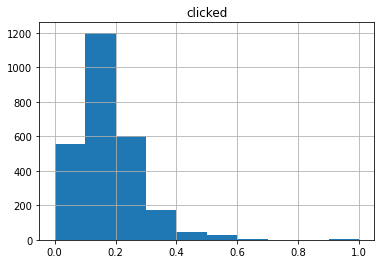

In [109]:
conv_rate = click_train[['creativeId','clicked']].groupby('creativeId').mean()
conv_rate.hist()

In [110]:
conv_rate

,clicked
creativeId,
6,0.306068
7,0.127535
8,0.236759
11,0.118823
13,0.152334
...,...
7177,0.294118
7178,0.189732
7179,0.141553


**For ads displayed to users with different device type (`device` in `event.csv`) calculated coversion rate? Do you observe any noticable difference between these groups?**

<AxesSubplot:xlabel='device'>

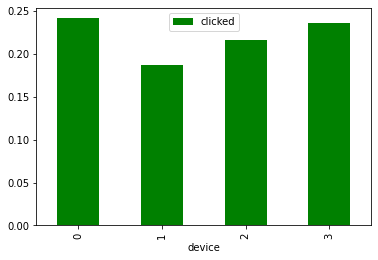

In [122]:
conv_result = pd.merge(click_train, event, how="inner", on='displayId')
conv_rate_device = conv_result[['device','clicked']].groupby('device').mean()
conv_rate_device.plot(kind='bar', color='g')

**For ads displayed to users with different operating systems (`OS` in `event.csv`) calculated coversion rate? Do you observe any noticable difference between these groups?**

<AxesSubplot:xlabel='OS'>

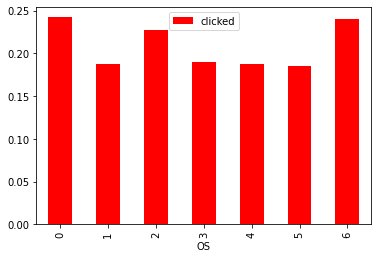

In [121]:
conv_rate_os = conv_result[['OS','clicked']].groupby('OS').mean()
conv_rate_os.plot(kind='bar',color='r')

## ➡️ Coversion Rate Prediction

**Using `creative_image.csv` we would like to predict a creativeId's conversion rate given its image features. Create a feature matrix and a target vector. Each row in feature matrix corresponds to a sample in the dataset and each column is associated with a certain feature that is extracted from ad images.**

In [167]:
img = creative_image[creative_image['creativeId'].isin(conv_rate.index)].set_index('creativeId')
img['imageFeatures']=img['imageFeatures'].str.replace('[','')
img['imageFeatures']=img['imageFeatures'].str.replace(']','')
img

/var/folders/bf/9616ns414yg2qn2p8czl2sr00000gn/T/ipykernel_6379/1105593672.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  img['imageFeatures']=img['imageFeatures'].str.replace('[','')
/var/folders/bf/9616ns414yg2qn2p8czl2sr00000gn/T/ipykernel_6379/1105593672.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  img['imageFeatures']=img['imageFeatures'].str.replace(']','')


,imageFeatures
creativeId,
7182,"0.17772938311100006, 0.6273877620697021, 0.554..."
7181,"0.27603843808174133, 0.1960456222295761, 0.345..."
7179,"0.2053901106119156, 0.0146206459030509, 0.0, 0..."
7178,"1.1388229131698608, 0.041852112859487534, 0.00..."
7177,"0.974502444267273, 0.08183272927999496, 0.0777..."
...,...
13,"0.14816689491271973, 0.04346756637096405, 1.34..."
11,"0.04297146946191788, 0.01642996445298195, 0.07..."
8,"0.15623298287391663, 0.00098716514185071, 0.01..."


In [168]:
X = pd.DataFrame(img['imageFeatures'].str.split(',').values.tolist(), index=img.index)
X

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
creativeId,,,,,,,,,,,,,,,,,,,,,
7182,0.17772938311100006,0.6273877620697021,0.5540745854377747,0.15807786583900452,0.0,0.5646096467971802,0.012419491074979305,0.28944942355155945,0.3847510516643524,0.028059156611561775,...,0.2918948531150818,0.0,1.6381527185440063,0.17841188609600067,1.0869417190551758,0.10961750149726868,3.026505947113037,0.30468887090682983,0.19596092402935028,0.8100115656852722
7181,0.27603843808174133,0.1960456222295761,0.34529611468315125,0.0027654231525957584,0.7305001020431519,0.07010011374950409,0.5121979117393494,0.7102327942848206,0.09154678881168365,0.09556830674409866,...,0.02476584166288376,0.006100913509726524,0.7267781496047974,1.002822756767273,0.45594322681427,0.9348267316818237,1.201000452041626,0.0,0.36104878783226013,0.6911806464195251
7179,0.2053901106119156,0.0146206459030509,0.0,0.006129640154540539,0.13621704280376434,0.0070520248264074326,0.13242055475711823,0.0,0.0,0.4549894332885742,...,0.06394478678703308,0.13998368382453918,0.9359045624732971,0.0,0.02583496645092964,0.08611463010311127,0.043866634368896484,0.2876746952533722,0.4430772662162781,0.018351182341575623
7178,1.1388229131698608,0.041852112859487534,0.00038473622407764196,0.035155609250068665,0.37716829776763916,0.1238778829574585,1.2031022310256958,0.024889584630727768,0.6748654246330261,0.5204238891601562,...,0.04835885763168335,0.14312632381916046,0.5068604350090027,1.717037558555603,0.5005058646202087,0.6016530394554138,0.2923209071159363,0.0,0.8114801645278931,0.24787557125091553
7177,0.974502444267273,0.08183272927999496,0.07775187492370605,0.1016809493303299,0.5605099201202393,0.04369446635246277,1.5151219367980957,0.07569503039121628,0.9517310857772827,0.5516675114631653,...,0.10652421414852142,0.061194442212581635,0.2340526133775711,2.0979514122009277,0.9740111231803894,1.4249491691589355,0.10013874620199203,0.0,0.5376392006874084,0.22975340485572815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,0.14816689491271973,0.04346756637096405,1.3417057991027832,1.2260162830352783,0.37994620203971863,0.17332454025745392,0.4010600447654724,0.13456659018993378,0.0,0.011322887614369392,...,0.693747341632843,0.011229078285396099,0.09387290477752686,0.3531852960586548,0.9417420625686646,0.0,0.5557636618614197,0.22357749938964844,0.07136861234903336,0.018053125590085983
11,0.04297146946191788,0.01642996445298195,0.07002853602170944,0.0,0.5629841089248657,0.22341543436050415,1.1442210674285889,0.6304935216903687,0.12370504438877106,0.15411390364170074,...,0.05807593837380409,0.09990502148866653,1.0242071151733398,0.7491246461868286,0.01797669753432274,1.0226629972457886,2.738048791885376,0.022184858098626137,0.13593655824661255,0.7101718187332153
8,0.15623298287391663,0.00098716514185071,0.014773990958929062,0.20774225890636444,0.03803592547774315,0.011584059335291386,0.4490736126899719,0.06624316424131393,0.14865271747112274,0.32543259859085083,...,0.0,0.0,0.0,0.44129133224487305,0.1939140409231186,0.6390106081962585,0.04603582248091698,0.0,0.06106970086693764,0.12514741718769073


In [178]:
for i in X.columns:
    X[i] = X[i].astype('float')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2616 entries, 7182 to 6
Columns: 512 entries, 0.0 to 511.0
dtypes: float64(512)
memory usage: 10.2 MB


,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,502.0,503.0,504.0,505.0,506.0,507.0,508.0,509.0,510.0,511.0
count,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,...,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000,2616.000000
mean,0.284419,0.153225,0.428328,0.199602,0.415003,0.155630,0.534800,0.279825,0.199700,0.250460,...,0.250102,0.312311,0.386748,0.594601,0.414281,0.360426,0.361675,0.134348,0.288020,0.315914
std,0.392671,0.341898,0.702849,0.249898,0.406198,0.203194,0.643670,0.490523,0.316865,0.339208,...,0.266340,0.430445,0.599755,0.663547,0.627848,0.474069,0.421386,0.298738,0.274191,0.436337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.037057,0.000000,0.015114,0.035357,0.112949,0.017650,0.047108,0.013852,0.006574,0.024832,...,0.051384,0.028197,0.023545,0.102067,0.036660,0.042879,0.094770,0.000000,0.079521,0.026638
50%,0.140656,0.025981,0.113869,0.112162,0.302169,0.085391,0.303863,0.099269,0.078113,0.122577,...,0.168689,0.156313,0.166383,0.375004,0.167878,0.181404,0.227748,0.000731,0.208301,0.157693
75%,0.368833,0.160166,0.548175,0.264610,0.601959,0.219256,0.808348,0.325273,0.256890,0.339882,...,0.368306,0.423869,0.510382,0.890641,0.510956,0.492660,0.467880,0.140331,0.429175,0.412440
max,2.909743,3.252048,5.604120,1.778496,3.606562,1.920787,5.193848,5.828279,3.246505,3.192734,...,1.870162,4.520008,7.364327,6.052149,6.052927,5.013512,3.915421,4.236050,2.159456,3.186852


In [184]:
X = X.sort_index() # feature matrix
y = conv_rate.sort_index() # target vector

**Use a linear regression model to predict conversion rate given image features for each creativeId. Evaluate your model's performance using 5-fold cross-validation. Does adding polynomial features boost the performance? Use mean-squared-error as your evaluation metric.**

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [186]:
X_train, X_test, y_train,y_test = train_test_split(X, y ,test_size=0.2, random_state=0)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'MSE on validation set = {mean_squared_error(y_test, y_pred)}')

MSE on validation set = 0.013273097541988523


**Find a subset of image features that contain the most amount of information about the target values. You may use correlation matrix for this purpose.**

In [190]:
datas = pd.merge(X, y, how="inner", left_index=True, right_index=True)
datas

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,503.0,504.0,505.0,506.0,507.0,508.0,509.0,510.0,511.0,clicked
creativeId,,,,,,,,,,,,,,,,,,,,,
6,0.000000,0.000000,0.049760,0.407064,0.177637,0.071936,0.000000,0.000000,0.000000,0.001921,...,0.454925,0.000000,0.010478,0.205283,0.000000,0.006869,0.366349,0.359391,0.000000,0.306068
7,0.106277,0.087542,3.344223,0.645454,1.301556,0.121954,0.000000,0.000000,0.000000,0.049404,...,0.733772,0.000000,1.211627,0.486232,0.000000,0.118570,0.079808,0.159126,0.012901,0.127535
8,0.156233,0.000987,0.014774,0.207742,0.038036,0.011584,0.449074,0.066243,0.148653,0.325433,...,0.000000,0.000000,0.441291,0.193914,0.639011,0.046036,0.000000,0.061070,0.125147,0.236759
11,0.042971,0.016430,0.070029,0.000000,0.562984,0.223415,1.144221,0.630494,0.123705,0.154114,...,0.099905,1.024207,0.749125,0.017977,1.022663,2.738049,0.022185,0.135937,0.710172,0.118823
13,0.148167,0.043468,1.341706,1.226016,0.379946,0.173325,0.401060,0.134567,0.000000,0.011323,...,0.011229,0.093873,0.353185,0.941742,0.000000,0.555764,0.223577,0.071369,0.018053,0.152334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7177,0.974502,0.081833,0.077752,0.101681,0.560510,0.043694,1.515122,0.075695,0.951731,0.551668,...,0.061194,0.234053,2.097951,0.974011,1.424949,0.100139,0.000000,0.537639,0.229753,0.294118
7178,1.138823,0.041852,0.000385,0.035156,0.377168,0.123878,1.203102,0.024890,0.674865,0.520424,...,0.143126,0.506860,1.717038,0.500506,0.601653,0.292321,0.000000,0.811480,0.247876,0.189732
7179,0.205390,0.014621,0.000000,0.006130,0.136217,0.007052,0.132421,0.000000,0.000000,0.454989,...,0.139984,0.935905,0.000000,0.025835,0.086115,0.043867,0.287675,0.443077,0.018351,0.141553


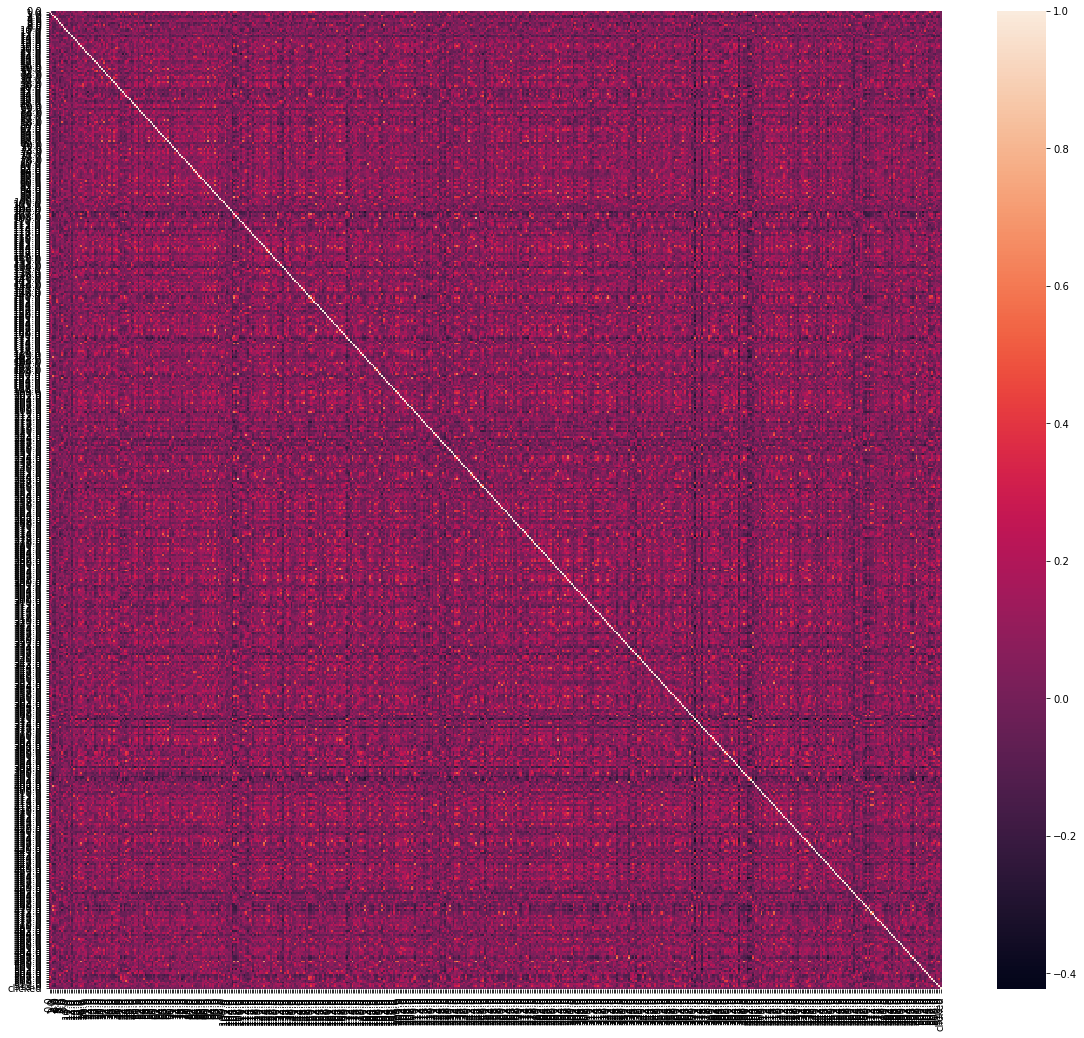

In [193]:
import seaborn as sns
plt.figure(figsize=(20, 18))
corr = datas.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

In [194]:
corr['clicked'].sort_values(ascending=False)

clicked    1.000000
114.0      0.159947
287.0      0.143325
122.0      0.128889
136.0      0.128868
             ...   
179.0     -0.107112
26.0      -0.119491
192.0     -0.131152
117.0     -0.136735
431.0     -0.142872
Name: clicked, Length: 513, dtype: float64

**Apply PCA on image features. Plot a diagram to depict variance accross each calculated principle componenet. Choose a few principle components along which image features has to larget variance.**

**Construct a linear regression model and fit the model on the transformed image features you calculated previously. Evaluate your model's performance using 5-fold cross-validation. Does transforming data using PCA help increase model's performance?**